In [1]:
import sqlite3 as sql

import numpy as np
import pandas as pd
from pandas import cut, read_sql
import pickle as pkl
from random import choices
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.optimize as optimize
from standard_plotting import set_size

In [2]:
indir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/track_cascade_sets/"
small_small_MC = pd.read_csv(indir + 'Old_muon_more_noise_Monte_Carlo_neutrino_prob_logit_above_12_all_variables.csv').reset_index(drop=True)

In [3]:
small_small_MC = small_small_MC[small_small_MC['L3_oscNext_bool']==1]
print(len(small_small_MC))

347


In [9]:

def calc_rho_36(x,y) :
    '''
    Radial distance from string 36 (approximately central within DeepCore)
    '''
    return np.sqrt( (x-46.29) ** 2 + (y+34.88) ** 2 )

small_small_MC['rho_pred'] = calc_rho_36(small_small_MC['position_x_pred'].values,small_small_MC['position_y_pred'].values)
small_small_MC['rho'] = calc_rho_36(small_small_MC['position_x'].values,small_small_MC['position_y'].values)


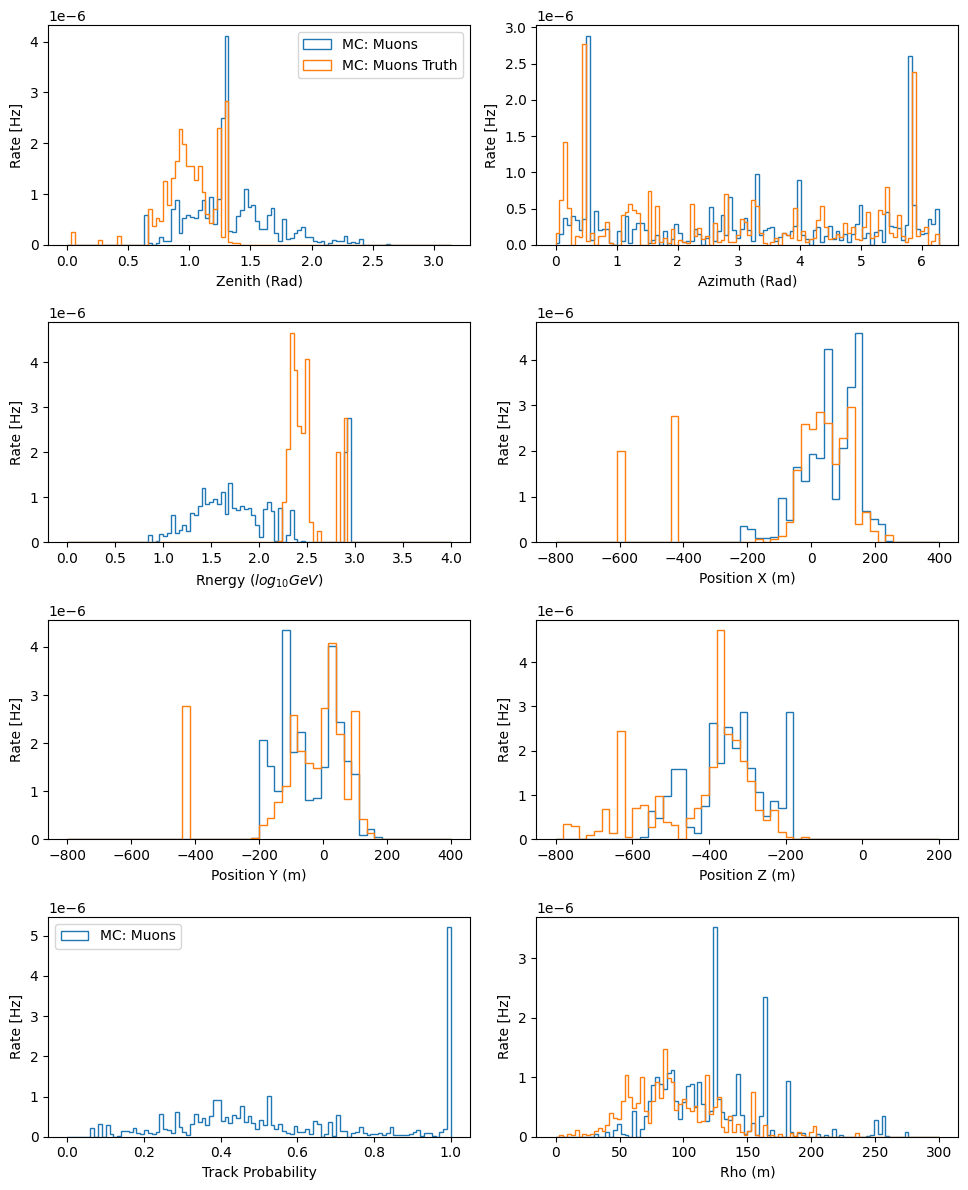

In [10]:
fig, axs = plt.subplots(4,2,figsize=set_size('thesis',fraction=1.75,subplots=(4,2),y_size=12))

bins=np.linspace(0,np.pi,101)
axs[0,0].hist(small_small_MC['zenith_pred'], histtype='step',density=False,label='MC: Muons',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])
axs[0,0].hist(small_small_MC['zenith'], histtype='step',density=False,label='MC: Muons Truth',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])

axs[0,0].set_xlabel('Zenith (Rad)')
axs[0,0].set_ylabel('Rate [Hz]')
#axs[0,0].set_xlim(right=3.7)
axs[0,0].legend(loc='upper right')


bins=np.linspace(0,2*np.pi,101)
axs[0,1].hist(small_small_MC['azimuth_pred'], histtype='step',density=False,label='MC Muons',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])
axs[0,1].hist(small_small_MC['azimuth'], histtype='step',density=False,label='MC Muons Truth',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])

axs[0,1].set_xlabel('Azimuth (Rad)')
axs[0,1].set_ylabel('Rate [Hz]')
#axs[0,1].set_ylim(top=0.4)
#axs[0,1].legend(loc='upper right')



bins=np.linspace(0,4,101)
axs[1,0].hist(np.log10(small_small_MC['energy_pred']), histtype='step',density=False,label='MC Muons',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])
axs[1,0].hist(np.log10(small_small_MC['energy']), histtype='step',density=False,label='MC Muons Truth',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])

axs[1,0].set_xlabel(r'Rnergy $(log_{10} GeV)$')
axs[1,0].set_ylabel('Rate [Hz]')
#axs[1,0].legend(loc='upper right')


up = 400
down = -800
bins=np.linspace(down,up,51)
axs[1,1].hist(np.clip(small_small_MC['position_x_pred'],down,up), histtype='step',density=False,label='MC Muons',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])
axs[1,1].hist(np.clip(small_small_MC['position_x'],down,up), histtype='step',density=False,label='MC Muons Truth',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])

axs[1,1].set_xlabel('Position X (m)')
axs[1,1].set_ylabel('Rate [Hz]')
#axs[1,1].set_ylim(top=0.01)
#axs[1,1].set_yscale('log')
#axs[1,0].legend(loc='upper right')

up = 400
down = -800
bins=np.linspace(down,up,51)
axs[2,0].hist(np.clip(small_small_MC['position_y_pred'],down,up), histtype='step',density=False,label='MC Muons',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])
axs[2,0].hist(np.clip(small_small_MC['position_y'],down,up), histtype='step',density=False,label='MC Muons Truth',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])

axs[2,0].set_xlabel('Position Y (m)')
axs[2,0].set_ylabel('Rate [Hz]')
#axs[2,0].set_ylim(top=0.01)
# axs[2,0].set_yscale('log')
#axs[2,0].legend(loc='upper right')

up = 200
down = -800
bins=np.linspace(down,up,51)
axs[2,1].hist(np.clip(small_small_MC['position_z_pred'],down,up), histtype='step',density=False,label='MC Muons',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])
axs[2,1].hist(np.clip(small_small_MC['position_z'],down,up), histtype='step',density=False,label='MC Muons Truth',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])

axs[2,1].set_xlabel('Position Z (m)')
axs[2,1].set_ylabel('Rate [Hz]')
#axs[2,1].set_ylim(top=0.008)
# axs[2,1].set_yscale('log')
#xs[2,0].legend(loc='upper right')

bins=np.linspace(0,1,101)
axs[3,0].hist(small_small_MC['track_mu_pred'], histtype='step',label='MC: Muons',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])

axs[3,0].set_xlabel('Track Probability')
axs[3,0].set_ylabel('Rate [Hz]')
axs[3,0].legend(loc='best')

bins=np.linspace(0,300,101)
axs[3,1].hist(small_small_MC['rho_pred'], histtype='step',label='MC: Muons',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])
axs[3,1].hist(small_small_MC['rho'], histtype='step',label='MC: Muons Truth',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])

axs[3,1].set_xlabel('Rho (m)')
axs[3,1].set_ylabel('Rate [Hz]')

fig.tight_layout()
#outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/muon_noise_(neutrinos)/"
#fig.savefig(outdir + 'muon_noise_neutrinos_where_in_all_predictions.png',bbox_inches='tight')

In [7]:
print(np.sum(small_small_MC['total_osc_weight'][small_small_MC['track_mu_pred']>0.9]))
print(np.sum(small_small_MC['total_osc_weight'][small_small_MC['track_mu_pred']<0.5]))

6.032904554603147e-06
1.2961106425194043e-05


In [8]:
print(np.sum(small_small_MC['total_osc_weight']))
small_small_MC_with_zenith_cut = small_small_MC[np.cos(small_small_MC['zenith_pred'])<0.3]
print(np.sum(small_small_MC_with_zenith_cut['total_osc_weight']))

small_small_MC_with_zenith_cut_and_energy = small_small_MC[(np.cos(small_small_MC['zenith_pred'])<0.3) & (small_small_MC['energy_pred'] > 5) & (small_small_MC['energy_pred'] < 300)]
print(np.sum(small_small_MC_with_zenith_cut['total_osc_weight']))


small_small_MC_with_zenith_cut_and_energy_and_containment = small_small_MC[(np.cos(small_small_MC['zenith_pred'])<0.3) & (small_small_MC['energy_pred'] > 5) & (small_small_MC['energy_pred'] < 300) & (small_small_MC['position_z'] > -500) & (small_small_MC['position_z'] < -200) & (small_small_MC['rho'] < 300)]
print(np.sum(small_small_MC_with_zenith_cut_and_energy_and_containment['total_osc_weight']))


2.601973584428542e-05
1.655312154992638e-05
1.655312154992638e-05
7.667196746526316e-06


In [3]:
# indir_small_small_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/track_cascade_sets/Burnsample_1_percent_neutrino_prob_logit_above_12_all_variables.csv"

In [4]:
# small_small_RD = pd.read_csv(indir_small_small_RD).reset_index(drop=True)

In [5]:
# print(small_small_RD.head(10))

   track_mu_pred  event_no  energy_pred  zenith_pred  zenith_kappa  \
0       0.225212    2537.0    26.221209     0.787562      8.013301   
1       0.322284    2818.0    15.618834     1.210662     17.105774   
2       0.318939   13238.0    12.410908     1.572945      7.252696   
3       0.316544   13923.0    79.322128     1.551025     11.849467   
4       0.434113   15952.0    39.425129     1.090729     17.347380   
5       0.533399   19130.0    10.582935     1.176755      3.592545   
6       0.369324   19240.0    14.587916     1.637644     15.870487   
7       0.039491   22082.0  1305.758545     1.714010     15.240388   
8       0.413601   27757.0     4.762780     2.089735     12.077574   
9       0.436763   33836.0     2.951172     1.781552      3.729376   

   azimuth_pred  azimuth_kappa  pid_noise_pred  pid_muon_pred  \
0      4.901435       3.584099    1.104591e-16   4.340229e-09   
1      4.079655       8.971777    7.210103e-19   1.424784e-06   
2      3.443087       0.902699    